In [215]:
import pandas as pd

In [216]:
songs_df=pd.read_csv('../data/raw/spotify_songs.csv')

In [217]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [218]:
songs_df.columns=songs_df.columns.str.strip()

In [219]:
songs_df.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [220]:
songs_df.dtypes

Unnamed: 0            int64
name                 object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
duration_ms           int64
time_signature        int64
id                   object
html                 object
dtype: object

In [221]:
songs_df.head(5)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


#### Remove irrelevant columns

In [222]:
songs_df['type'].value_counts()

type
    5235
Name: count, dtype: int64

In [223]:
songs_df=songs_df.drop(['Unnamed: 0','type','id','html'],axis=1)

In [224]:
songs_df.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

#### Check for null values

In [225]:
# columns that must not be zero or null  ['loudness', 'tempo', 'duration_ms', 'time_signature']

In [226]:
songs_df.loc[songs_df['tempo']==0 | songs_df['tempo'].isnull()]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
629,Shake It Off ...,Taylor Swift,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,219000,0


In [227]:
 songs_df=songs_df.loc[songs_df['tempo'] !=0 ]

In [228]:
songs_df.loc[songs_df['tempo']==0]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [229]:
songs_df.loc[songs_df['duration_ms']==0 | songs_df['duration_ms'].isnull()]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [230]:
songs_df.loc[songs_df['time_signature']==0 |songs_df['time_signature'].isnull()]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [231]:
songs_df.loc[songs_df['loudness']==0 |songs_df['loudness'].isnull()]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [232]:
songs_df.isnull().sum()

name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### Check for Duplicates

In [233]:
songs_df.duplicated().sum()

np.int64(71)

In [234]:
songs_df.loc[songs_df.duplicated()]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
107,Já Sei Namorar - 2004 Digital Remaster ...,Tribalistas,0.670,0.822,9,-6.687,0,0.0570,0.670000,0.001150,0.1320,0.833,145.560,196987,4
144,Berekerê - Voice ...,Geraldo Azevedo,0.434,0.573,4,-11.203,0,0.0666,0.830000,0.000000,0.0584,0.786,172.189,316600,4
758,It Wasn't Me ...,Shaggy,0.853,0.606,0,-4.596,1,0.0713,0.056100,0.000000,0.3130,0.654,94.759,227600,4
1019,Do You Believe in Magic? ...,The Lovin' Spoonful,0.553,0.738,0,-7.963,1,0.0457,0.213000,0.000000,0.3390,0.759,138.602,125827,4
1026,Wake up Little Susie ...,The Everly Brothers,0.709,0.620,2,-9.382,1,0.0340,0.318000,0.000000,0.0426,0.936,93.723,123520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,Don't Let Me Down ...,The Chainsmokers,0.532,0.869,11,-5.094,1,0.1720,0.157000,0.005080,0.1360,0.422,159.803,208373,4
3117,Hot Right Now - Radio Edit ...,DJ Fresh,0.524,0.972,4,-1.569,0,0.0431,0.006560,0.000580,0.2240,0.476,175.017,182333,4
3164,You Can Get It If You Really Want ...,Jimmy Cliff,0.894,0.559,1,-8.547,1,0.0568,0.248000,0.000000,0.0762,0.929,128.164,158893,4
4628,Favorite (Vampire) ...,NCT 127,0.561,0.758,5,-3.870,0,0.0478,0.000831,0.000003,0.1500,0.178,149.944,215587,4


In [235]:
songs_df.loc[songs_df['artist']=='Tribalistas']

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [236]:
songs_df['artist']=songs_df['artist'].str.strip()

In [237]:
songs_df['name']=songs_df['name'].str.strip()

In [238]:
songs_df.drop_duplicates(inplace=True)

In [239]:
songs_df.duplicated().sum()

np.int64(0)

In [240]:
songs_df.duplicated(subset=['name','artist']).sum()

np.int64(50)

In [245]:
songs_df.loc[songs_df.duplicated(subset=['name','artist'])]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [242]:
songs_df.loc[songs_df['name']=='TiK ToK']

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
666,TiK ToK,Kesha,0.755,0.832,2,-2.741,0,0.116,0.0746,0.000001,0.291,0.735,120.032,199693,4
1550,TiK ToK,Kesha,0.755,0.837,2,-2.718,0,0.142,0.0991,0.000000,0.289,0.714,120.028,199693,4


In [244]:
 songs_df=songs_df.groupby(['name', 'artist'], as_index=False).mean(numeric_only=True)


In [246]:
songs_df.loc[songs_df['name']=='Rebel Rebel']

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3495,Rebel Rebel,Seu Jorge,0.7435,0.236,6.0,-14.8575,0.0,0.0556,0.892,0.000157,0.1815,0.4345,122.8835,155520.0,4.0


In [248]:
songs_df.duplicated(subset=['name','artist']).sum()

np.int64(0)

#### data validation check.

<Axes: >

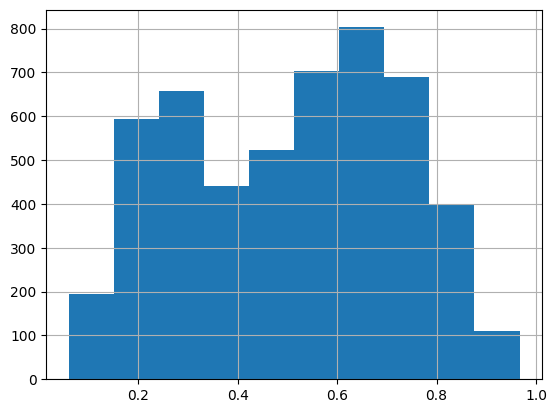

In [252]:
songs_df['danceability'].hist()

<Axes: >

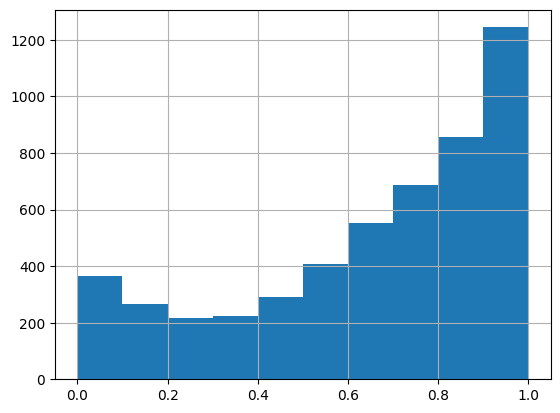

In [254]:
songs_df['energy'].hist()

<Axes: >

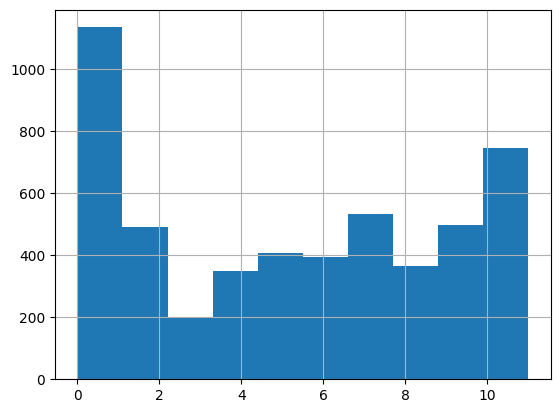

In [255]:
songs_df['key'].hist()

<Axes: >

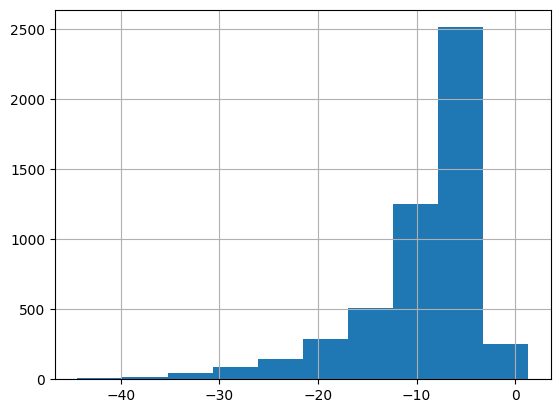

In [257]:
songs_df['loudness'].hist()

In [258]:
songs_df.loc[songs_df['loudness']>=0]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
252,Alright,Big Surr,0.377,0.986,4.0,1.148,1.0,0.0556,0.1210,0.549000,0.1910,0.2460,99.980,174750.0,4.0
1765,Gone,Big Surr,0.386,0.995,9.0,0.788,1.0,0.0873,0.3250,0.885000,0.2280,0.0659,100.868,151707.0,4.0
2611,Little Bitty Pretty One,Thurston Harris,0.703,0.883,8.0,1.085,1.0,0.2410,0.7770,0.000002,0.0562,0.8870,88.351,143067.0,4.0
4797,We Are Your Friends - Justice Vs Simian,Justice,0.615,0.970,9.0,1.342,0.0,0.1190,0.0104,0.384000,0.1780,0.5070,122.993,262773.0,4.0


In [259]:
songs_df=songs_df.loc[songs_df['loudness']<0]

In [260]:
songs_df.loc[songs_df['loudness']>=0]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


<Axes: >

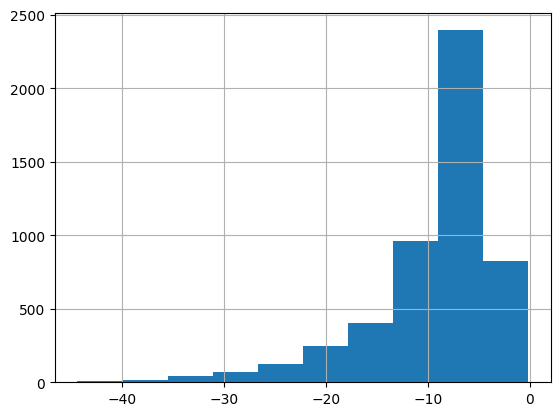

In [261]:
songs_df['loudness'].hist()

<Axes: >

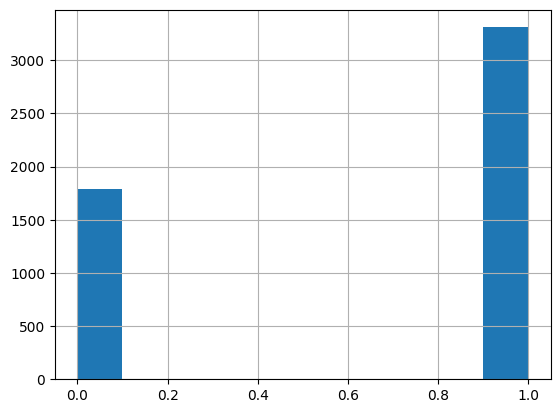

In [262]:
songs_df['mode'].hist()

<Axes: >

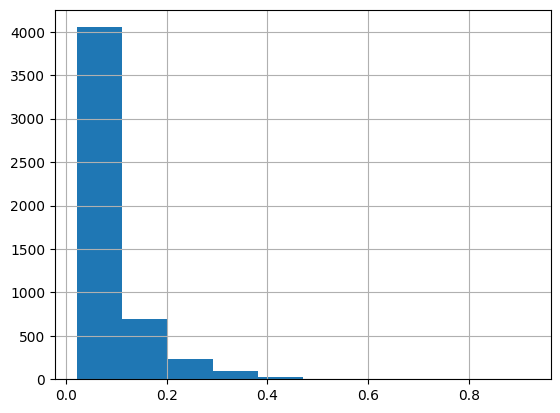

In [263]:
songs_df['speechiness'].hist()

<Axes: >

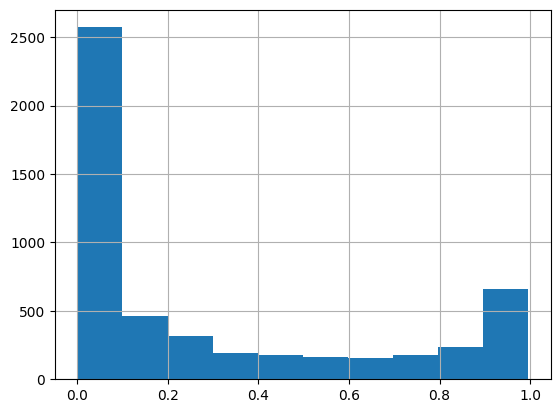

In [267]:
songs_df['acousticness'].hist()

<Axes: >

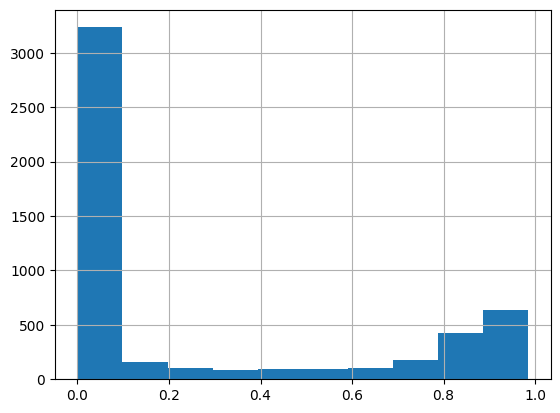

In [268]:
songs_df['instrumentalness'].hist()

<Axes: >

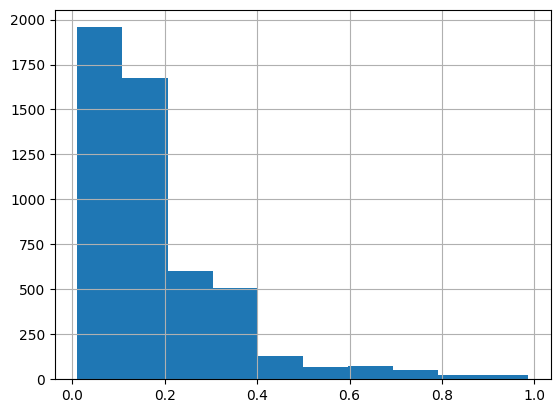

In [269]:
songs_df['liveness'].hist()

<Axes: >

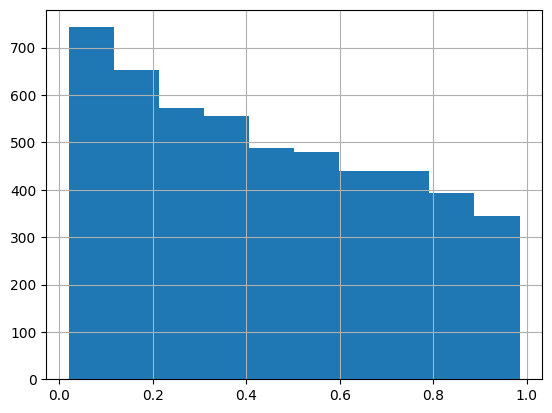

In [270]:
songs_df['valence'].hist()

<Axes: >

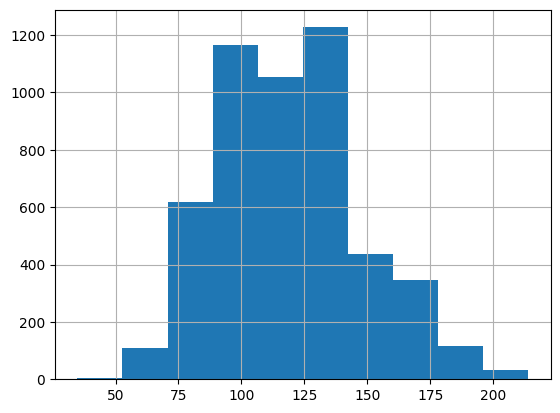

In [271]:
songs_df['tempo'].hist()

<Axes: >

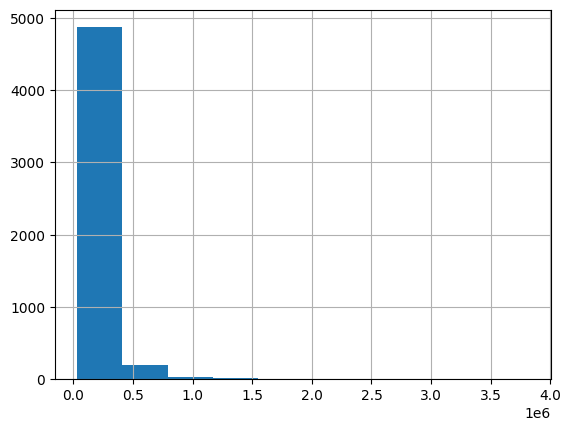

In [272]:
songs_df['duration_ms'].hist()

<Axes: >

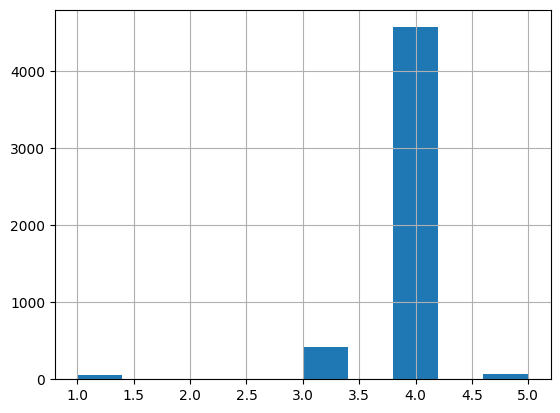

In [274]:
songs_df['time_signature'].hist()

#### Data types check 

In [276]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5112
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5109 non-null   object 
 1   artist            5109 non-null   object 
 2   danceability      5109 non-null   float64
 3   energy            5109 non-null   float64
 4   key               5109 non-null   float64
 5   loudness          5109 non-null   float64
 6   mode              5109 non-null   float64
 7   speechiness       5109 non-null   float64
 8   acousticness      5109 non-null   float64
 9   instrumentalness  5109 non-null   float64
 10  liveness          5109 non-null   float64
 11  valence           5109 non-null   float64
 12  tempo             5109 non-null   float64
 13  duration_ms       5109 non-null   float64
 14  time_signature    5109 non-null   float64
dtypes: float64(13), object(2)
memory usage: 638.6+ KB


In [280]:
# convert mode/key/duration_ms dtype back to integer
songs_df['mode']=songs_df['mode'].astype('int64')
songs_df['key']=songs_df['key'].astype('int64')
songs_df['duration_ms']=songs_df['duration_ms'].astype('int64')
songs_df['time_signature']=songs_df['time_signature'].astype('int64')

In [281]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5112
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5109 non-null   object 
 1   artist            5109 non-null   object 
 2   danceability      5109 non-null   float64
 3   energy            5109 non-null   float64
 4   key               5109 non-null   int64  
 5   loudness          5109 non-null   float64
 6   mode              5109 non-null   int64  
 7   speechiness       5109 non-null   float64
 8   acousticness      5109 non-null   float64
 9   instrumentalness  5109 non-null   float64
 10  liveness          5109 non-null   float64
 11  valence           5109 non-null   float64
 12  tempo             5109 non-null   float64
 13  duration_ms       5109 non-null   int64  
 14  time_signature    5109 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 638.6+ KB


#### last checks befor saving

In [282]:
songs_df.isnull().sum()

name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [283]:
songs_df.duplicated().sum()

np.int64(0)

In [284]:
songs_df.duplicated(subset=['name','artist']).sum()

np.int64(0)

In [285]:
songs_df.to_csv('../data/processed/cleaned_spotify_songs.csv')